In [2]:
# Works best with jupyter-notebook

In [3]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import math
import numpy as np

from roboticstoolbox import *
import roboticstoolbox as rtb

from spatialmath import *
from spatialmath.base import *
import spatialmath.base.symbolic as sym

import matplotlib.pyplot as plt
np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

# Lecture 5.8

Denavit-Hartenberg parameterisation only uses 4 numbers to desribe each joint. 

Let's study DH parameters usin a 2-link planar robot model. We have 2 links (though the base is referred as link 0) and 2 joints. 

In [4]:
robot = rtb.models.DH.Planar2()
print(robot)

┏━━━━┳━━━━━┳━━━━┳━━━━━━┓
┃θⱼ  ┃ dⱼ  ┃ aⱼ ┃  ⍺ⱼ  ┃
┣━━━━╋━━━━━╋━━━━╋━━━━━━┫
┃ q1 ┃ 0.0 ┃  1 ┃ 0.0° ┃
┃ q2 ┃ 0.0 ┃  1 ┃ 0.0° ┃
┗━━━━┻━━━━━┻━━━━┻━━━━━━┛

┌─────┬──────┬──────┐
│name │ q0   │ q1   │
├─────┼──────┼──────┤
│  qz │  0°  │  0°  │
│  q1 │  0°  │  90° │
│  q2 │  90° │ -90° │
└─────┴──────┴──────┘



<IPython.core.display.Javascript object>


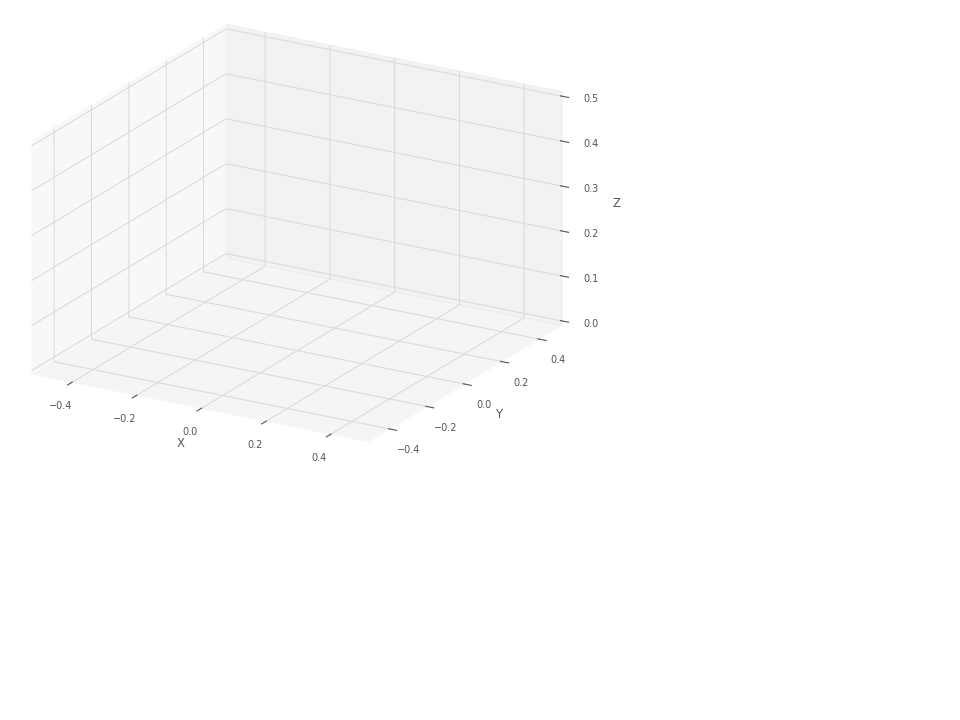

RuntimeError: cannot use teach panel under Jupyter

In [5]:
import matplotlib; #matplotlib.use("nbAgg") 
from mpl_toolkits.mplot3d import Axes3D

robot.q=[0.2, 0.3]
robot.teach();

Given a set of joint anles, we can then capture the pose of the end-effector of the robot

In [ ]:
print(robot.fkine(robot.q))

If we want each of the individual Homogenous transformations from one joint to the next, you can use fkine_all()

In [ ]:
T = robot.fkine_all(robot.q)
print(T)
type(T)
print('The first transformation: ', T[0])
print('The second transformation: ', T[1])

### Puma 560 Model
Now, let's look at the 6 DOF puma 560 model.

In [ ]:
robot = rtb.models.DH.Puma560()
print(robot)

Defined joint configurations are:
- qz, zero joint angle configuration, ‘L’ shaped configuration
- qn, arm is at a nominal non-singular configuration
- qr, vertical ‘READY’ configuration
- qs, arm is stretched out in the x-direction

In [ ]:
print(robot.qz)
robot.plot(robot.qz);

In [ ]:
# Arm in non-singular config
print(robot.qn)
robot.plot(robot.qn);

In [ ]:
# Upwards in the ready position
print(robot.qn)
robot.plot(robot.qr);

In [ ]:
# Stretched in the x-direction
print(robot.qs)
robot.plot(robot.qs);

You can also arbitrarily assign the values of the joint angles to produce a particular end-effector pose in Homogenous transformation form.

In [7]:
T = robot.fkine([0.1, 0.2, 0.3, 0.4, 0.3, 0.2])
print(T)

[0] =
   0.955336   -0.29552     0           1.95034      
   0.29552     0.955336    0           0.395354     
   0           0           1           0            
   0           0           0           1            
[1] =
   0.764842   -0.644218    0           1.72018      
   0.644218    0.764842    0           0.939738     
   0           0           1           0            
   0           0           0           1            
[2] =
   0.877583   -0.479426    0           1.83292      
   0.479426    0.877583    0           0.774946     
   0           0           1           0            
   0           0           0           1            



# Student Exercise... 
Explore how different joint angle configurations affects the end-effector position and orientation of the robot's end-effector.

## Base and Tool Transform

In [ ]:
# See the base transform
robot.base

In [ ]:
# See the tool transform  
robot.tool

We can modify the base via translations or rotations

In [ ]:
robot.base = SE3.Tx(10)*SE3.Ty(15)*SE3.Tz(2)
robot.base
T = robot.fkine([0.1, 0.2, 0.3, 0, 0, 0])
print(T)

In [ ]:
# Rotate it upside down
robot.base = SE3.Rx(np.pi)
T = robot.fkine([0.1, 0.2, 0.3, 0, 0, 0])
print(T)

# Student exercise:
Try changing the tool with an offset of 0.05m in the z-direction. And see how the coords change